In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      3
total_rooms             5
total_bedrooms        211
population             12
households             10
median_income           9
median_house_value      8
dtype: int64

In [6]:
df['housing_median_age']=df['housing_median_age'].fillna(df['housing_median_age'].mean())

In [7]:
df['total_rooms']=df['total_rooms'].fillna(df['total_rooms'].mean())

In [8]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [9]:
df['population']=df['population'].fillna(df['population'].mean())

In [10]:
df['households']=df['households'].fillna(df['households'].mean())

In [11]:
df['median_income']=df['median_income'].fillna(df['median_income'].mean())

In [12]:
df['median_house_value']=df['median_house_value'].fillna(df['median_house_value'].mean())

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [15]:
X=df.drop('median_house_value',axis=1)

In [16]:
y=df['median_house_value']

In [17]:
#X

In [18]:
#y

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
preds=model.predict(X_test)

In [25]:
preds

array([175774.52635281, 287387.80795934, 176563.779742  , ...,
        97219.40244384, 196149.31020122, 171419.54957417])

In [26]:
y_test

1945     196300.0
18006    275000.0
13062    127500.0
13396    158900.0
9787      87500.0
           ...   
2931      48700.0
2060      89500.0
5224     100000.0
15474    163300.0
13745    138100.0
Name: median_house_value, Length: 6192, dtype: float64

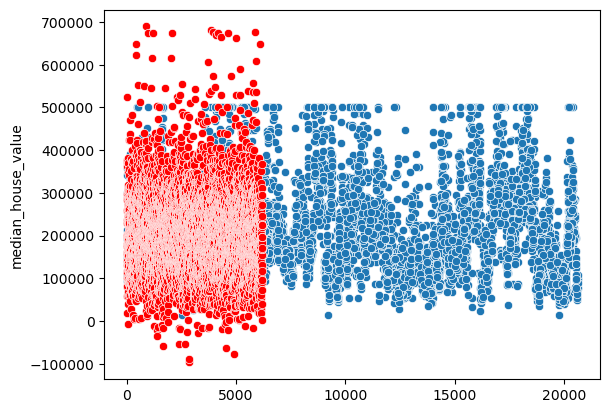

In [27]:
sns.scatterplot(y_test)
sns.scatterplot(preds,color='red');

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mean_absolute_error(y_test,preds)

50820.330652956065

In [30]:
mean_squared_error(y_test,preds)

4876622397.554228

In [31]:
model.score(X_train, y_train)

0.6362341699901826

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [34]:
polynomial=poly.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(polynomial, y, test_size=0.3, random_state=50)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model1=LinearRegression()

In [39]:
model1.fit(X_train,y_train)

LinearRegression()

In [40]:
test_preds=model1.predict(X_test)

In [41]:
test_preds

array([171689.61593582, 299485.95403847, 175950.54723162, ...,
        74488.03246655, 180685.65298093, 178984.36344859])

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(y_test,test_preds)

45687.02495365169

In [44]:
mean_squared_error(y_test,test_preds)

4212860865.265787

In [45]:
model1.score(X_train,y_train)

0.7013203611483558

In [46]:
new_data = {'longitude':-122.23,
            'latitude':37.88,
    'housing_median_age': 30,
    'total_rooms': 5000,
    'total_bedrooms': 1000,
    'population': 2000,
    'households': 800,
    'median_income': 4.0
}
new_data_df = pd.DataFrame([new_data])


predicted_value = model.predict(new_data_df)

predicted_value

array([252927.6756051])